In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/creditcard.csv')

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

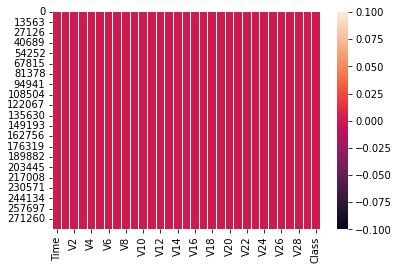

In [ ]:
df.isnull().sum()
sns.heatmap(df.isnull())
plt.show()

In [ ]:
##### The data looks clean therefore we can directly apply machine learning algorithms to predict the output
##### We can start start with feature selection method PCA (Principle Component Analysis)

In [ ]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
df1=df.drop('Class',axis=1)
df2=df['Class']

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df2

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

In [ ]:
from sklearn.preprocessing import MinMaxScaler
for col in df1:
  mx=MinMaxScaler()
  df1[col]=mx.fit_transform(df1[[col]])

In [ ]:
df1.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.000000,0.935192,0.766490,0.881365,0.313023,0.763439,0.267669,0.266815,0.786444,0.475312,0.510600,0.252484,0.680908,0.371591,0.635591,0.446084,0.434392,0.737173,0.655066,0.594863,0.582942,0.561184,0.522992,0.663793,0.391253,0.585122,0.394557,0.418976,0.312697,0.005824
1,0.000000,0.978542,0.770067,0.840298,0.271796,0.766120,0.262192,0.264875,0.786298,0.453981,0.505267,0.381188,0.744342,0.486190,0.641219,0.383840,0.464105,0.727794,0.640681,0.551930,0.579530,0.557840,0.480237,0.666938,0.336440,0.587290,0.446013,0.416345,0.313423,0.000105
2,0.000006,0.935217,0.753118,0.868141,0.268766,0.762329,0.281122,0.270177,0.788042,0.410603,0.513018,0.322422,0.706683,0.503854,0.640473,0.511697,0.357443,0.763381,0.644945,0.386683,0.585855,0.565477,0.546030,0.678939,0.289354,0.559515,0.402727,0.415489,0.311911,0.014739
3,0.000006,0.941878,0.765304,0.868484,0.213661,0.765647,0.275559,0.266803,0.789434,0.414999,0.507585,0.271817,0.710910,0.487635,0.636372,0.289124,0.415653,0.711253,0.788492,0.467058,0.578050,0.559734,0.510277,0.662607,0.223826,0.614245,0.389197,0.417669,0.314371,0.004807
4,0.000012,0.938617,0.776520,0.864251,0.269796,0.762975,0.263984,0.268968,0.782484,0.490950,0.524303,0.236355,0.724477,0.552509,0.608406,0.349419,0.434995,0.724243,0.650665,0.626060,0.584615,0.561327,0.547271,0.663392,0.401270,0.566343,0.507497,0.420561,0.317490,0.002724


In [ ]:
df_new=pd.concat([df1,df2],axis=1)

In [ ]:
df_new.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,0.935192,0.766490,0.881365,0.313023,0.763439,0.267669,0.266815,0.786444,0.475312,0.510600,0.252484,0.680908,0.371591,0.635591,0.446084,0.434392,0.737173,0.655066,0.594863,0.582942,0.561184,0.522992,0.663793,0.391253,0.585122,0.394557,0.418976,0.312697,0.005824,0
1,0.000000,0.978542,0.770067,0.840298,0.271796,0.766120,0.262192,0.264875,0.786298,0.453981,0.505267,0.381188,0.744342,0.486190,0.641219,0.383840,0.464105,0.727794,0.640681,0.551930,0.579530,0.557840,0.480237,0.666938,0.336440,0.587290,0.446013,0.416345,0.313423,0.000105,0
2,0.000006,0.935217,0.753118,0.868141,0.268766,0.762329,0.281122,0.270177,0.788042,0.410603,0.513018,0.322422,0.706683,0.503854,0.640473,0.511697,0.357443,0.763381,0.644945,0.386683,0.585855,0.565477,0.546030,0.678939,0.289354,0.559515,0.402727,0.415489,0.311911,0.014739,0
3,0.000006,0.941878,0.765304,0.868484,0.213661,0.765647,0.275559,0.266803,0.789434,0.414999,0.507585,0.271817,0.710910,0.487635,0.636372,0.289124,0.415653,0.711253,0.788492,0.467058,0.578050,0.559734,0.510277,0.662607,0.223826,0.614245,0.389197,0.417669,0.314371,0.004807,0
4,0.000012,0.938617,0.776520,0.864251,0.269796,0.762975,0.263984,0.268968,0.782484,0.490950,0.524303,0.236355,0.724477,0.552509,0.608406,0.349419,0.434995,0.724243,0.650665,0.626060,0.584615,0.561327,0.547271,0.663392,0.401270,0.566343,0.507497,0.420561,0.317490,0.002724,0


In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df_new['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

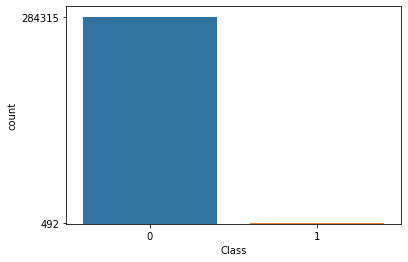

In [ ]:
sns.countplot(data=df_new,x='Class')
c=df_new['Class'].value_counts()
plt.yticks(c)
plt.show()

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
X=df_new.drop('Class',axis=1)
Y=df_new['Class']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [ ]:
# Applying sampling technique

In [ ]:
ros=RandomOverSampler()
X_train1,Y_train1=ros.fit_resample(X_train,Y_train)

In [ ]:
pd.Series(Y_train).value_counts()

0    199007
1       357
Name: Class, dtype: int64

In [ ]:
pd.Series(Y_train1).value_counts()

0    199007
1    199007
Name: Class, dtype: int64

In [ ]:
pd.Series(Y_test).value_counts()

0    85308
1      135
Name: Class, dtype: int64

In [ ]:
X_test1,Y_test1=ros.fit_resample(X_test,Y_test)

In [ ]:
pd.Series(Y_test1).value_counts()

0    85308
1    85308
Name: Class, dtype: int64

In [ ]:
def create_model(model):
    model.fit(X_train1,Y_train1)
    Y_pred=model.predict(X_test1)
    print("Classification Report")
    print(classification_report(Y_test1,Y_pred))
    print("Confusion Matrix")
    print(confusion_matrix(Y_test1,Y_pred))
    return model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
lr=LogisticRegression()

In [ ]:
lr=create_model(lr)

Classification Report
              precision    recall  f1-score   support

           0       0.88      0.98      0.93     85308
           1       0.98      0.87      0.92     85308

    accuracy                           0.93    170616
   macro avg       0.93      0.93      0.93    170616
weighted avg       0.93      0.93      0.93    170616

Confusion Matrix
[[83893  1415]
 [11276 74032]]


In [ ]:
### Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt=DecisionTreeClassifier()

In [ ]:
dt=create_model(dt)

Classification Report
              precision    recall  f1-score   support

           0       0.76      1.00      0.87     85308
           1       1.00      0.69      0.82     85308

    accuracy                           0.84    170616
   macro avg       0.88      0.84      0.84    170616
weighted avg       0.88      0.84      0.84    170616

Confusion Matrix
[[85275    33]
 [26478 58830]]


In [ ]:

dt1=DecisionTreeClassifier(max_depth=6)
dt1=create_model(dt1)

Classification Report
              precision    recall  f1-score   support

           0       0.85      0.96      0.90     85308
           1       0.95      0.83      0.89     85308

    accuracy                           0.89    170616
   macro avg       0.90      0.89      0.89    170616
weighted avg       0.90      0.89      0.89    170616

Confusion Matrix
[[81812  3496]
 [14438 70870]]


In [ ]:
dt2=DecisionTreeClassifier(min_samples_leaf=45)
dt2=create_model(dt2)

Classification Report
              precision    recall  f1-score   support

           0       0.83      1.00      0.91     85308
           1       1.00      0.79      0.88     85308

    accuracy                           0.90    170616
   macro avg       0.91      0.90      0.89    170616
weighted avg       0.91      0.90      0.89    170616

Confusion Matrix
[[85152   156]
 [17590 67718]]


In [ ]:
dt3=DecisionTreeClassifier(criterion='entropy')
dt3=create_model(dt3)

Classification Report
              precision    recall  f1-score   support

           0       0.77      1.00      0.87     85308
           1       1.00      0.71      0.83     85308

    accuracy                           0.85    170616
   macro avg       0.89      0.85      0.85    170616
weighted avg       0.89      0.85      0.85    170616

Confusion Matrix
[[85266    42]
 [25138 60170]]


In [ ]:
dt4=DecisionTreeClassifier(min_samples_leaf=45,criterion='entropy')
dt4=create_model(dt4)

Classification Report
              precision    recall  f1-score   support

           0       0.83      1.00      0.91     85308
           1       1.00      0.80      0.89     85308

    accuracy                           0.90    170616
   macro avg       0.92      0.90      0.90    170616
weighted avg       0.92      0.90      0.90    170616

Confusion Matrix
[[85107   201]
 [16944 68364]]


In [ ]:
dt5=DecisionTreeClassifier(max_depth=8,criterion='entropy')
dt5=create_model(dt5)

Classification Report
              precision    recall  f1-score   support

           0       0.80      0.99      0.89     85308
           1       0.99      0.76      0.86     85308

    accuracy                           0.88    170616
   macro avg       0.90      0.88      0.87    170616
weighted avg       0.90      0.88      0.87    170616

Confusion Matrix
[[84869   439]
 [20796 64512]]


In [ ]:
# Support Vector Machine

In [ ]:
from sklearn.svm import LinearSVC

In [ ]:
svc=LinearSVC(random_state=1)

In [ ]:
svc=create_model(svc)

Classification Report
              precision    recall  f1-score   support

           0       0.88      0.98      0.93     85308
           1       0.98      0.87      0.92     85308

    accuracy                           0.93    170616
   macro avg       0.93      0.93      0.93    170616
weighted avg       0.93      0.93      0.93    170616

Confusion Matrix
[[84008  1300]
 [11276 74032]]


In [ ]:
svc=LinearSVC(random_state=1,C=0.05)
svc=create_model(svc)

Classification Report
              precision    recall  f1-score   support

           0       0.88      0.99      0.93     85308
           1       0.99      0.87      0.92     85308

    accuracy                           0.93    170616
   macro avg       0.93      0.93      0.93    170616
weighted avg       0.93      0.93      0.93    170616

Confusion Matrix
[[84208  1100]
 [11276 74032]]


In [ ]:
from sklearn.svm import SVC

In [ ]:
radial_svc=SVC(random_state=1,kernel='rbf')
radial_svc=create_model(radial_svc)

Classification Report
              precision    recall  f1-score   support

           0       0.88      0.99      0.93     85308
           1       0.99      0.86      0.92     85308

    accuracy                           0.92    170616
   macro avg       0.93      0.92      0.92    170616
weighted avg       0.93      0.92      0.92    170616

Confusion Matrix
[[84262  1046]
 [11871 73437]]


In [ ]:
#Ensembling technique : -  
'''There are different types of Ensembling Technique : 
1. Naive Aggregation method
a. Hard Voting         b. Soft Voting
2. Bootstraping 
a. Bagging     b. Pasting
3. Boosting Technique 
a. ADA Boost  b. Gradient Boost c. Extreme Gradient Boost (XGBoost)
4. Stacking'''

'There are different types of Ensembling Technique : \n1. Naive Aggregation method\na. Hard Voting         b. Soft Voting\n2. Bootstraping \na. Bagging     b. Pasting\n3. Boosting Technique \na. ADA Boost  b. Gradient Boost c. Extreme Gradient Boost (XGBoost)\n4. Stacking'

In [ ]:
# Naive Agreegation Method
# 1. Hard voting

In [ ]:
lr=LogisticRegression()
dtg=DecisionTreeClassifier()
dte=DecisionTreeClassifier(criterion='entropy')
svc=LinearSVC(random_state=1,C=0.04)
radial_svc=SVC(random_state=1,kernel='rbf')

In [ ]:
model_list=[('Logistc Regression: ',lr),('Decision Tree Gini: ',dt),('Decision Tree Entropy: ',dt3)]

In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
vc=VotingClassifier(estimators=model_list)
vc=create_model(vc)

Classification Report
              precision    recall  f1-score   support

           0       0.81      1.00      0.90     85308
           1       1.00      0.77      0.87     85308

    accuracy                           0.89    170616
   macro avg       0.91      0.89      0.88    170616
weighted avg       0.91      0.89      0.88    170616

Confusion Matrix
[[85279    29]
 [19526 65782]]


In [ ]:
# 2. Soft Voting

In [ ]:
vc1=VotingClassifier(estimators=model_list,voting='soft')
vc1=create_model(vc1)

Classification Report
              precision    recall  f1-score   support

           0       0.81      1.00      0.89     85308
           1       1.00      0.76      0.87     85308

    accuracy                           0.88    170616
   macro avg       0.90      0.88      0.88    170616
weighted avg       0.90      0.88      0.88    170616

Confusion Matrix
[[85277    31]
 [20144 65164]]


In [ ]:
# Bootstrapping

In [ ]:
# 1. Bagging

In [ ]:
from sklearn.ensemble import BaggingClassifier

In [ ]:
bc=BaggingClassifier(LogisticRegression(),n_estimators=10,max_samples=15000,random_state=1)
bc=create_model(bc)

Classification Report
              precision    recall  f1-score   support

           0       0.88      0.99      0.93     85308
           1       0.99      0.87      0.92     85308

    accuracy                           0.93    170616
   macro avg       0.93      0.93      0.93    170616
weighted avg       0.93      0.93      0.93    170616

Confusion Matrix
[[84281  1027]
 [11312 73996]]


In [ ]:
bc1=BaggingClassifier(DecisionTreeClassifier(),n_estimators=10,max_samples=15000,random_state=1)
bc1=create_model(bc1)

Classification Report
              precision    recall  f1-score   support

           0       0.84      1.00      0.91     85308
           1       1.00      0.81      0.89     85308

    accuracy                           0.90    170616
   macro avg       0.92      0.90      0.90    170616
weighted avg       0.92      0.90      0.90    170616

Confusion Matrix
[[85205   103]
 [16286 69022]]


In [ ]:
bc2=BaggingClassifier(LinearSVC(random_state=1,C=0.04),n_estimators=10,max_samples=15000,random_state=1)
bc2=create_model(bc2)

Classification Report
              precision    recall  f1-score   support

           0       0.87      0.99      0.92     85308
           1       0.99      0.85      0.91     85308

    accuracy                           0.92    170616
   macro avg       0.93      0.92      0.92    170616
weighted avg       0.93      0.92      0.92    170616

Confusion Matrix
[[84571   737]
 [13158 72150]]


In [ ]:
bc3=BaggingClassifier(SVC(random_state=1,kernel='rbf'),n_estimators=10,max_samples=15000,random_state=1)
bc3=create_model(bc3)

Classification Report
              precision    recall  f1-score   support

           0       0.88      0.99      0.93     85308
           1       0.99      0.86      0.92     85308

    accuracy                           0.92    170616
   macro avg       0.93      0.92      0.92    170616
weighted avg       0.93      0.92      0.92    170616

Confusion Matrix
[[84352   956]
 [11917 73391]]


In [ ]:
bc8=BaggingClassifier(DecisionTreeClassifier(criterion='entropy'),n_estimators=10,max_samples=15000,random_state=1)
bc8=create_model(bc8)

Classification Report
              precision    recall  f1-score   support

           0       0.82      1.00      0.90     85308
           1       1.00      0.78      0.88     85308

    accuracy                           0.89    170616
   macro avg       0.91      0.89      0.89    170616
weighted avg       0.91      0.89      0.89    170616

Confusion Matrix
[[85199   109]
 [18839 66469]]


In [ ]:
# 2. Pasting

In [ ]:
bc4=BaggingClassifier(LogisticRegression(),n_estimators=10,max_samples=15000,random_state=1,bootstrap=False)
bc4=create_model(bc4)

Classification Report
              precision    recall  f1-score   support

           0       0.88      0.99      0.93     85308
           1       0.99      0.87      0.92     85308

    accuracy                           0.93    170616
   macro avg       0.93      0.93      0.93    170616
weighted avg       0.93      0.93      0.93    170616

Confusion Matrix
[[84297  1011]
 [11312 73996]]


In [ ]:
bc5=BaggingClassifier(DecisionTreeClassifier(),n_estimators=10,max_samples=15000,random_state=1,bootstrap=False)
bc5=create_model(bc5)

Classification Report
              precision    recall  f1-score   support

           0       0.84      1.00      0.91     85308
           1       1.00      0.81      0.89     85308

    accuracy                           0.90    170616
   macro avg       0.92      0.90      0.90    170616
weighted avg       0.92      0.90      0.90    170616

Confusion Matrix
[[85193   115]
 [16314 68994]]


In [ ]:
bc6=BaggingClassifier(LinearSVC(random_state=1,C=0.04),n_estimators=10,max_samples=15000,random_state=1,bootstrap=False)
bc6=create_model(bc6)

Classification Report
              precision    recall  f1-score   support

           0       0.87      0.99      0.92     85308
           1       0.99      0.85      0.91     85308

    accuracy                           0.92    170616
   macro avg       0.93      0.92      0.92    170616
weighted avg       0.93      0.92      0.92    170616

Confusion Matrix
[[84578   730]
 [13158 72150]]


In [ ]:
bc7=BaggingClassifier(SVC(random_state=1,kernel='rbf'),n_estimators=10,max_samples=15000,random_state=1,bootstrap=False)
bc7=create_model(bc7)

Classification Report
              precision    recall  f1-score   support

           0       0.88      0.99      0.93     85308
           1       0.99      0.86      0.92     85308

    accuracy                           0.92    170616
   macro avg       0.93      0.92      0.92    170616
weighted avg       0.93      0.92      0.92    170616

Confusion Matrix
[[84369   939]
 [11917 73391]]


In [ ]:
bc9=BaggingClassifier(DecisionTreeClassifier(criterion='entropy'),n_estimators=10,max_samples=15000,random_state=1,bootstrap=False)
bc9=create_model(bc9)

Classification Report
              precision    recall  f1-score   support

           0       0.83      1.00      0.91     85308
           1       1.00      0.79      0.88     85308

    accuracy                           0.90    170616
   macro avg       0.91      0.90      0.90    170616
weighted avg       0.91      0.90      0.90    170616

Confusion Matrix
[[85180   128]
 [17580 67728]]


In [ ]:
# 3. Random Forest Tree

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc=RandomForestClassifier(n_estimators=10,max_features=20,random_state=1)
rfc=create_model(rfc)

Classification Report
              precision    recall  f1-score   support

           0       0.81      1.00      0.89     85308
           1       1.00      0.76      0.87     85308

    accuracy                           0.88    170616
   macro avg       0.90      0.88      0.88    170616
weighted avg       0.90      0.88      0.88    170616

Confusion Matrix
[[85297    11]
 [20118 65190]]


In [ ]:
# Stacking 

In [ ]:
#from mlxtend.classifier import StackingClassifier

In [ ]:
lr=LogisticRegression()
dtg=DecisionTreeClassifier()
dte=DecisionTreeClassifier(criterion='entropy')
svc=LinearSVC(random_state=1,C=0.07)
radial_svc=SVC(random_state=1,kernel='rbf')

In [ ]:
model_list=[lr,dtg,dte]

In [ ]:
meta=LogisticRegression()

In [ ]:
sc=StackingClassifier(classifiers=model_list,meta_classifier=meta)

In [ ]:
sc=create_model(sc)

In [ ]:
meta1=DecisionTreeClassifier()

In [ ]:
sc1=StackingClassifier(classifiers=model_list,meta_classifier=meta1)
sc1=create_model(sc1)

In [ ]:
meta2=DecisionTreeClassifier(criterion='entropy')

In [ ]:
sc2=StackingClassifier(classifiers=model_list,meta_classifier=meta2)
sc2=create_model(sc2)

In [ ]:
meta3=LinearSVC(random_state=1,C=0.07)

In [ ]:
sc3=StackingClassifier(classifiers=model_list,meta_classifier=meta3)
sc3=create_model(sc3)

In [ ]:
meta4=SVC(random_state=1,kernel='rbf')

In [ ]:
sc4=StackingClassifier(classifiers=model_list,meta_classifier=meta4)
sc4=create_model(sc4)

In [ ]:
# Boosting Technique

In [ ]:
# 1. ADA Boost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
ada=AdaBoostClassifier(n_estimators=100)
ada=create_model(ada)

Classification Report
              precision    recall  f1-score   support

           0       0.87      0.99      0.93     85308
           1       0.99      0.85      0.92     85308

    accuracy                           0.92    170616
   macro avg       0.93      0.92      0.92    170616
weighted avg       0.93      0.92      0.92    170616

Confusion Matrix
[[84692   616]
 [12539 72769]]


In [ ]:
# 2. Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gbc=GradientBoostingClassifier(n_estimators=100)
gbc=create_model(gbc)

Classification Report
              precision    recall  f1-score   support

           0       0.87      0.99      0.93     85308
           1       0.99      0.85      0.91     85308

    accuracy                           0.92    170616
   macro avg       0.93      0.92      0.92    170616
weighted avg       0.93      0.92      0.92    170616

Confusion Matrix
[[84850   458]
 [13190 72118]]


In [ ]:
#!pip install xgboost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xg=XGBClassifier(n_estimators=100,reg_alpha=1)
xg=create_model(xg)

Classification Report
              precision    recall  f1-score   support

           0       0.88      1.00      0.93     85308
           1       0.99      0.86      0.92     85308

    accuracy                           0.93    170616
   macro avg       0.94      0.93      0.93    170616
weighted avg       0.94      0.93      0.93    170616

Confusion Matrix
[[84895   413]
 [11953 73355]]


In [ ]:
# Feature Selection
'''
A. wrapper method
  1. forward selection  2. backward selection
B. PCA
'''

'\nA. wrapper method\n  1. forward selection  2. backward selection\nB. PCA\n'

In [ ]:
# 1. forward selection

In [ ]:
X=df_new.drop('Class',axis=1)
Y=df_new['Class']

In [ ]:
columns=[]
for col in X:
  columns.append(col)
  X_new=df_new[columns]
  X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)
  lr=LogisticRegression()
  lr.fit(X_train,Y_train)
  score=lr.score(X_test,Y_test)
  print('Column: ',col,'Score: ',score)

Column:  Time Score:  0.9990519995786665
Column:  V1 Score:  0.9990519995786665
Column:  V2 Score:  0.9990519995786665
Column:  V3 Score:  0.9990519995786665
Column:  V4 Score:  0.9990519995786665
Column:  V5 Score:  0.9990519995786665
Column:  V6 Score:  0.9990519995786665
Column:  V7 Score:  0.9990519995786665
Column:  V8 Score:  0.9990519995786665
Column:  V9 Score:  0.9990519995786665
Column:  V10 Score:  0.9990519995786665
Column:  V11 Score:  0.9990519995786665
Column:  V12 Score:  0.9990519995786665
Column:  V13 Score:  0.9990519995786665
Column:  V14 Score:  0.9990519995786665
Column:  V15 Score:  0.9990519995786665
Column:  V16 Score:  0.9990519995786665
Column:  V17 Score:  0.9990519995786665
Column:  V18 Score:  0.9990519995786665
Column:  V19 Score:  0.9990519995786665
Column:  V20 Score:  0.9990519995786665
Column:  V21 Score:  0.9990519995786665
Column:  V22 Score:  0.9990519995786665
Column:  V23 Score:  0.9990519995786665
Column:  V24 Score:  0.9990519995786665
Column: 

In [ ]:
# 2. Backward Selection

In [ ]:
columns=[]
for col in X:
  columns.append(col)
  X_new=df_new[columns]
  X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)
  lr=LogisticRegression()
  lr.fit(X_train,Y_train)
  score=lr.score(X_test,Y_test)
  print('Column: ',col,'Score: ',score)
  X_new=X_new.iloc[:,:-1]
  print('After Removing column', col)

Column:  Time Score:  0.9990519995786665
After Removing column Time
Column:  V1 Score:  0.9990519995786665
After Removing column V1
Column:  V2 Score:  0.9990519995786665
After Removing column V2
Column:  V3 Score:  0.9990519995786665
After Removing column V3
Column:  V4 Score:  0.9990519995786665
After Removing column V4
Column:  V5 Score:  0.9990519995786665
After Removing column V5
Column:  V6 Score:  0.9990519995786665
After Removing column V6
Column:  V7 Score:  0.9990519995786665
After Removing column V7
Column:  V8 Score:  0.9990519995786665
After Removing column V8
Column:  V9 Score:  0.9990519995786665
After Removing column V9
Column:  V10 Score:  0.9990519995786665
After Removing column V10
Column:  V11 Score:  0.9990519995786665
After Removing column V11
Column:  V12 Score:  0.9990519995786665
After Removing column V12
Column:  V13 Score:  0.9990519995786665
After Removing column V13
Column:  V14 Score:  0.9990519995786665
After Removing column V14
Column:  V15 Score:  0.999

In [ ]:
# 3. PCA

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
X=df_new.drop('Class',axis=1)
Y=df_new['Class']

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [ ]:
pc=PCA(n_components=24,random_state=1)
X_train_pc=pc.fit_transform(X_train,Y_train)

In [ ]:
X_test_pc=pc.transform(X_test)

In [ ]:
lr=LogisticRegression()
lr.fit(X_train_pc,Y_train)

LogisticRegression()

In [ ]:
lr.score(X_test_pc,Y_test)

0.9990519995786665